In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_theme()


%matplotlib inline


In [71]:

from zipfile import ZipFile
from subprocess import check_output
import zipfile, os


# Create a ZipFile Object and load sample.zip in it
with ZipFile('../instacart-market-basket-analysis.zip', 'r') as zipObj:
   # Extract all the contents of zip file in data directory
   zipObj.extractall("temp")


In [72]:


working_directory = '/home/lmo/NOVA_SBE/2487-ML/04_groupproject/instacart/temp'
os.chdir(working_directory)


for file in os.listdir(working_directory):   # get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall("../data")  # extract it in the working directory



print(check_output(["ls", "../data"]).decode("utf8"))

aisles.csv
departments.csv
__MACOSX
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



## 1. Loading the data and getting basic info about the different data

In [2]:
order_products_train_df = pd.read_csv("../data/order_products__train.csv")
order_products_prior_df = pd.read_csv("../data/order_products__prior.csv")
orders_df = pd.read_csv("../data/orders.csv")
products_df = pd.read_csv("../data/products.csv")
aisles_df = pd.read_csv("../data/aisles.csv")
departments_df = pd.read_csv("../data/departments.csv")

### 1.1 Order Products Train

In [3]:
print(order_products_train_df.head().to_markdown())

|    |   order_id |   product_id |   add_to_cart_order |   reordered |
|---:|-----------:|-------------:|--------------------:|------------:|
|  0 |          1 |        49302 |                   1 |           1 |
|  1 |          1 |        11109 |                   2 |           1 |
|  2 |          1 |        10246 |                   3 |           0 |
|  3 |          1 |        49683 |                   4 |           0 |
|  4 |          1 |        43633 |                   5 |           1 |


In [4]:
print(order_products_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
None


### 1.2 Order Products Prior

In [5]:
print(order_products_prior_df.head().to_markdown())

|    |   order_id |   product_id |   add_to_cart_order |   reordered |
|---:|-----------:|-------------:|--------------------:|------------:|
|  0 |          2 |        33120 |                   1 |           1 |
|  1 |          2 |        28985 |                   2 |           1 |
|  2 |          2 |         9327 |                   3 |           0 |
|  3 |          2 |        45918 |                   4 |           1 |
|  4 |          2 |        30035 |                   5 |           0 |


In [6]:
print(order_products_prior_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
None


In [65]:
len(orders_df)

3421083

### 1.3 Orders

In [7]:
print(orders_df.head().to_markdown())

|    |   order_id |   user_id | eval_set   |   order_number |   order_dow |   order_hour_of_day |   days_since_prior_order |
|---:|-----------:|----------:|:-----------|---------------:|------------:|--------------------:|-------------------------:|
|  0 |    2539329 |         1 | prior      |              1 |           2 |                   8 |                      nan |
|  1 |    2398795 |         1 | prior      |              2 |           3 |                   7 |                       15 |
|  2 |     473747 |         1 | prior      |              3 |           3 |                  12 |                       21 |
|  3 |    2254736 |         1 | prior      |              4 |           4 |                   7 |                       29 |
|  4 |     431534 |         1 | prior      |              5 |           4 |                  15 |                       28 |


In [8]:
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None


The order df contains details about the order such as order_id, user_id the order_number as well as the day of the week, the hour and the days since prior order. Let's check how the orders are distributed....

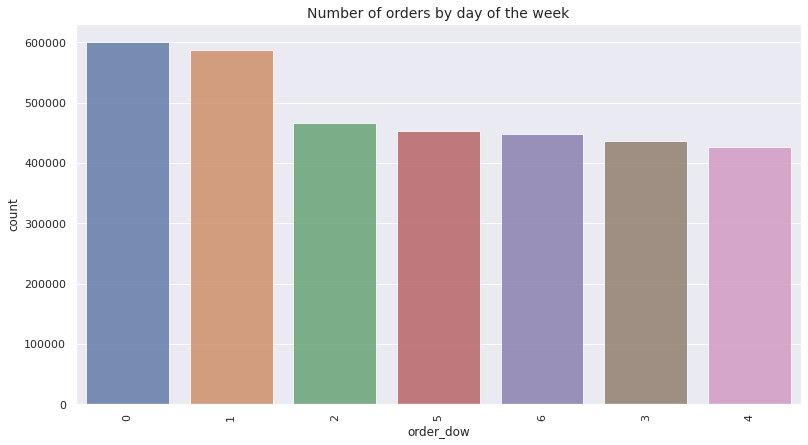

In [60]:
plt.figure(figsize=(13,7))
plt.title("Number of orders by day of the week", fontsize=14)
sns.countplot(x="order_dow", data=orders_df, order=orders_df.order_dow.value_counts().index, alpha=0.8)
plt.xticks(rotation=90)
plt.show()

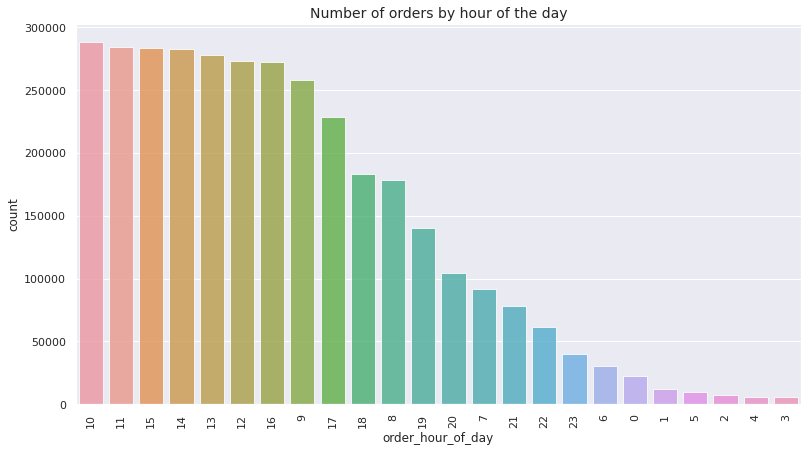

In [59]:
plt.figure(figsize=(13,7))
plt.title("Number of orders by hour of the day", fontsize=14)
sns.countplot(x="order_hour_of_day", data=orders_df, order=orders_df.order_hour_of_day.value_counts().index, alpha=0.8)
plt.xticks(rotation=90)
plt.show()

### 1.4 Products

In [9]:

print(products_df.head().to_markdown())

|    |   product_id | product_name                                                      |   aisle_id |   department_id |
|---:|-------------:|:------------------------------------------------------------------|-----------:|----------------:|
|  0 |            1 | Chocolate Sandwich Cookies                                        |         61 |              19 |
|  1 |            2 | All-Seasons Salt                                                  |        104 |              13 |
|  2 |            3 | Robust Golden Unsweetened Oolong Tea                              |         94 |               7 |
|  3 |            4 | Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce |         38 |               1 |
|  4 |            5 | Green Chile Anytime Sauce                                         |          5 |              13 |


In [10]:
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


There are a total of 49688 unique products. Let's explore how these products are distributed with regard to the departments and aisles. As The original products dataframe only containts department_ids and aisles_ids, let's first extend the df with the additional, qualitative information form the other dataframes

In [22]:
extended_products_df = products_df.merge(departments_df, on="department_id")
extended_products_df = extended_products_df.merge(aisles_df, on="aisle_id")

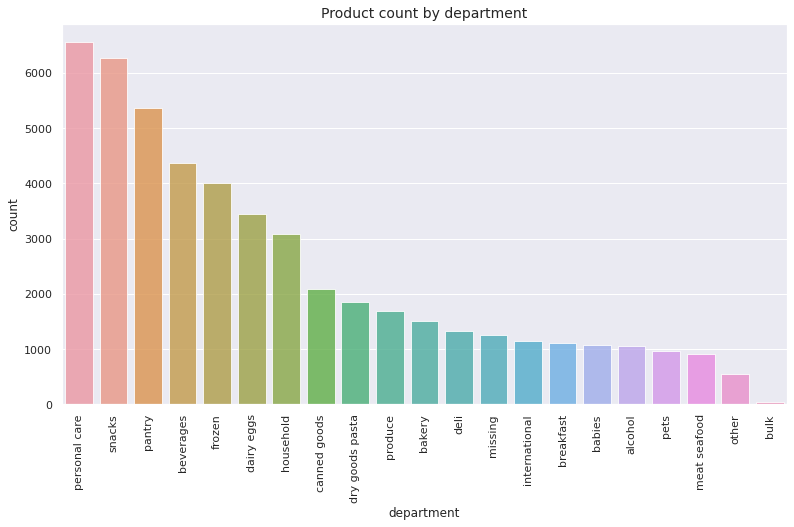

In [56]:
plt.figure(figsize=(13,7))
plt.title("Product count by department", fontsize=14)
sns.countplot(x="department", data=extended_products_df, order=extended_products_df.department.value_counts().index, alpha=0.8)
plt.xticks(rotation=90)
plt.show()

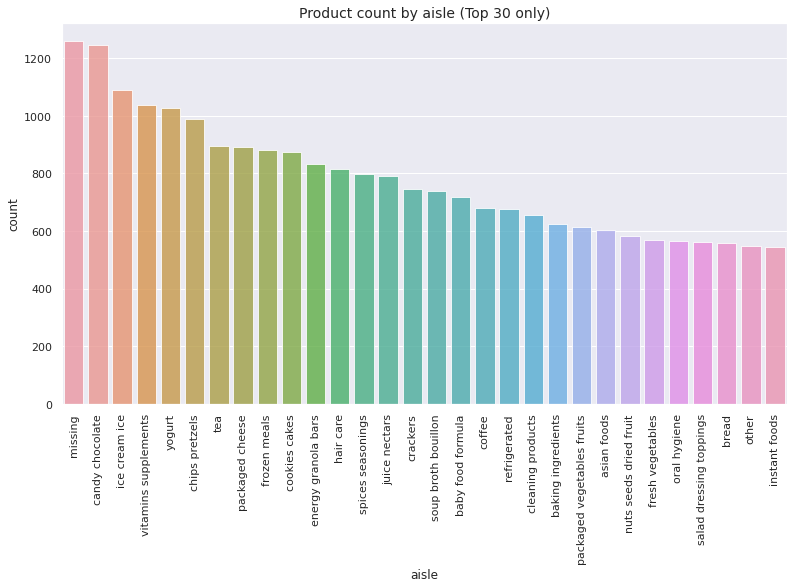

In [53]:
cnt_srs = extended_products_df["aisle"].value_counts().head(30)
plt.figure(figsize=(13,7))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.title("Product count by aisle (Top 30 only)", fontsize=14)
plt.ylabel("count", fontsize=12)
plt.xlabel('aisle', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### 1.5 Aisles

In [16]:
print(aisles_df.head().to_markdown())

|    |   aisle_id | aisle                      |
|---:|-----------:|:---------------------------|
|  0 |          1 | prepared soups salads      |
|  1 |          2 | specialty cheeses          |
|  2 |          3 | energy granola bars        |
|  3 |          4 | instant foods              |
|  4 |          5 | marinades meat preparation |


In [17]:
print(aisles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


There are a total of 135 different aisles

### 1.6 Departments

In [21]:
print(departments_df.head().to_markdown())

|    |   department_id | department   |
|---:|----------------:|:-------------|
|  0 |               1 | frozen       |
|  1 |               2 | other        |
|  2 |               3 | bakery       |
|  3 |               4 | produce      |
|  4 |               5 | alcohol      |


In [22]:
print(departments_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


There are a total of 21 departments

In [13]:
products = order_products_prior_df.groupby("product_id").count()["order_id"]
products = pd.DataFrame(products).rename(columns={"order_id":"cnt"}).sort_values(by="cnt", ascending=False)

products.plot(kind="bar")

<AxesSubplot:xlabel='product_id'>